The datas are ready to be analyzed using machine learning models.

==================== PT. 3 ======================
# MACHINE LEARNING MODELS 
=================================================

### PERFORMANCE METRICS

Using F1 Score (Micro) as a performance metrics is the form of Confusion Matrix to compare the performance of each ML model. The display function:

In [67]:
#Function to display confusion matrix
def make_confusion_matrix(pred, title):
    cam = confusion_matrix(y_test, pred)
    sb.heatmap(cam, annot=True, cmap='plasma', 
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'],
                fmt="d")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Using {} Algorithm'.format(title))
    plt.show()

### Model 1: Decision Tree

In [68]:
model_cv_dt = DecisionTreeClassifier(random_state=0)
kfold = KFold(n_splits=10)
scores_dt = cross_val_score(model_cv_dt, X_train, y_train, scoring="f1_micro", cv=kfold)
result_dt = scores_dt.mean()
print('Average F1 Score (Micro) for Decision Tree is : {}'.format(result_dt))

Average F1 Score (Micro) for Decision Tree is : 0.654402660526989


In [69]:
#Fit the Model
model_cv_dt.fit(X_train, y_train)
    
pred_dt = model_cv_dt.predict(X_test)
train_pred_dt = model_cv_dt.predict(X_train)

print(classification_report(y_test, pred_dt))
train_score_dt = f1_score(y_train, train_pred_dt, average='micro')
score_dt = f1_score(y_test, pred_dt, average='micro')
print('Train F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(train_score_dt))
print('Test F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(score_dt))

              precision    recall  f1-score   support

           1       0.49      0.51      0.50      6319
           2       0.71      0.70      0.71     36998
           3       0.61      0.61      0.61     21834

    accuracy                           0.65     65151
   macro avg       0.60      0.61      0.61     65151
weighted avg       0.65      0.65      0.65     65151

Train F1 Score (Micro) for Decision Tree Algorithm is : 0.9865029419288821
Test F1 Score (Micro) for Decision Tree Algorithm is : 0.6539577289680896


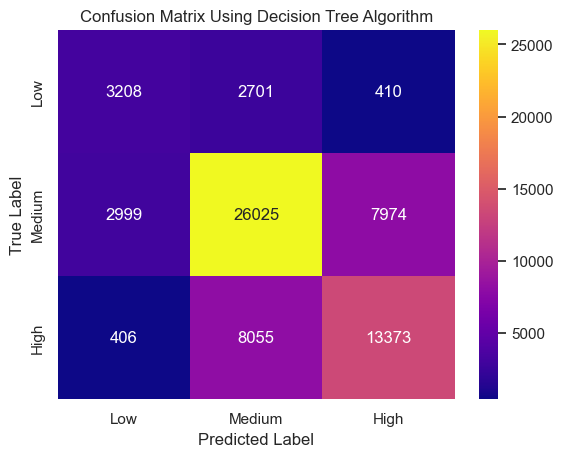

In [70]:
make_confusion_matrix(pred_dt, 'Decision Tree')

### Feature Importances of Decision Tree Model

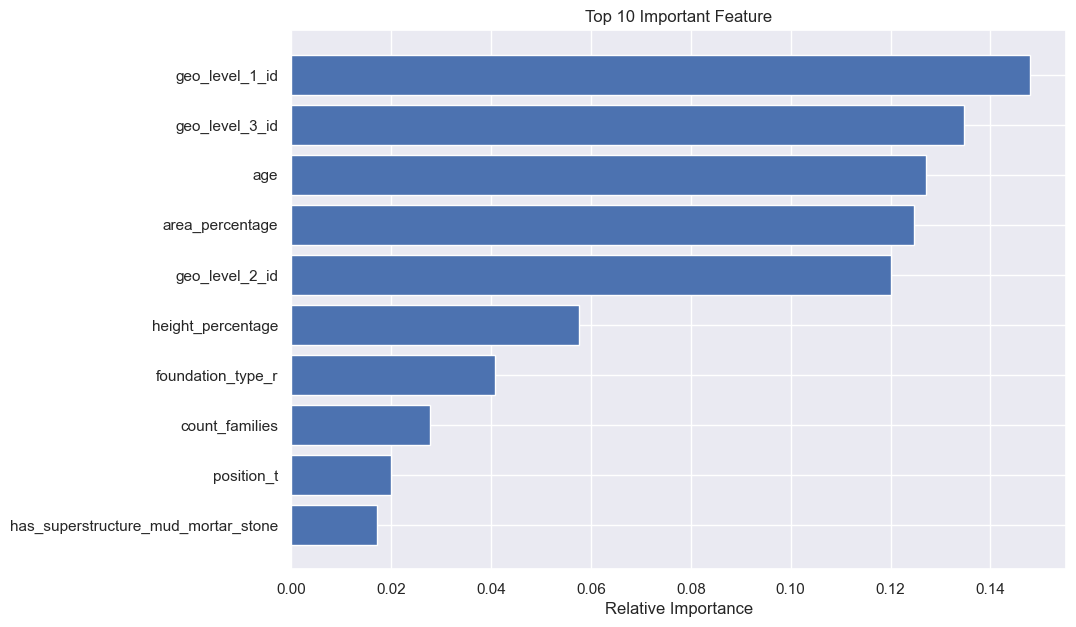

In [71]:
features = X.columns
importances = model_cv_dt.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices[-10:])), importances[indices][-10:], color='b', align='center')
plt.yticks(range(len(indices[-10:])), features[indices][-10:])
plt.xlabel('Relative Importance')
plt.title('Top 10 Important Feature')
plt.show()

### Model 2: Logistic Regression

In [86]:
model_cv_lr = LogisticRegression(random_state=0)
kfold = KFold(n_splits=10)
scores_lr = cross_val_score(model_cv_lr, X_train, y_train, scoring="f1_micro", cv=kfold)
result_lr = scores_lr.mean()
print('Average F1 Score (Micro) for Logistic Algorithm is : {}'.format(result_lr))

/Users/ali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  - `'l2'`: add a L2 penalty term and it is the default choice;
/Users/ali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

Average F1 Score (Micro) for Logistic Algorithm is : 0.5693834740342798


/Users/ali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  - `'l2'`: add a L2 penalty term and it is the default choice;


In [87]:
#Fit the model
model_cv_lr.fit(X_train, y_train)

pred_lr = model_cv_lr.predict(X_test)
train_pred_lr = model_cv_lr.predict(X_train)

print(classification_report(y_test, pred_lr))
train_score_lr = f1_score(y_train, train_pred_lr, average='micro')
score_lr = f1_score(y_test, pred_lr, average='micro')
print('Train F1 Score (Micro) for Logistic Regression Algorithm is : {}'.format(train_score_lr))
print('Test F1 Score (Micro) for Logistic Regression Algorithm is : {}'.format(score_lr))

              precision    recall  f1-score   support

           1       0.83      0.00      0.01      6319
           2       0.57      1.00      0.72     36998
           3       0.20      0.00      0.00     21834

    accuracy                           0.57     65151
   macro avg       0.53      0.33      0.24     65151
weighted avg       0.47      0.57      0.41     65151

Train F1 Score (Micro) for Logistic Regression Algorithm is : 0.5694295216167817
Test F1 Score (Micro) for Logistic Regression Algorithm is : 0.5680803057512548


/Users/ali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  - `'l2'`: add a L2 penalty term and it is the default choice;


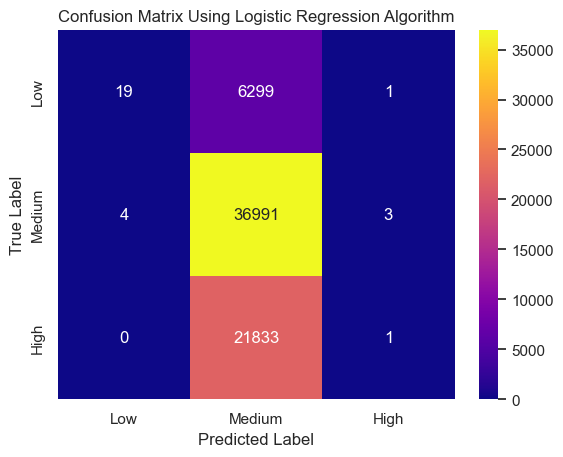

In [88]:
make_confusion_matrix(pred_lr, 'Logistic Regression')

Evaluation Result (3 best features according to this model) are:
##### NONE (No feature can be interpreted from this ML method)

### Model 3: Random Forest

In [89]:

from sklearn.ensemble import RandomForestClassifier
model_cv_rf = RandomForestClassifier(random_state=0)
kfold = KFold(n_splits=10)
scores_rf = cross_val_score(model_cv_rf, X_train, y_train, scoring="f1_micro", cv=kfold)
result_rf = scores_rf.mean()
print('Average F1 Score (Micro) for Random Forest is : {}'.format(result_rf))

Average F1 Score (Micro) for Random Forest is : 0.7130263494499871


In [90]:
#Fit the Model
model_cv_rf.fit(X_train, y_train)
    
pred_rf = model_cv_rf.predict(X_test)
train_pred_rf = model_cv_rf.predict(X_train)

print(classification_report(y_test, pred_rf))
train_score_rf = f1_score(y_train, train_pred_rf, average='micro')
score_rf = f1_score(y_test, pred_rf, average='micro')
print('Train F1 Score (Micro) for Random Forest Algorithm is : {}'.format(train_score_rf))
print('Test F1 Score (Micro) for Random Forest Algorithm is : {}'.format(score_rf))

              precision    recall  f1-score   support

           1       0.64      0.48      0.55      6319
           2       0.72      0.82      0.77     36998
           3       0.72      0.60      0.65     21834

    accuracy                           0.71     65151
   macro avg       0.69      0.63      0.66     65151
weighted avg       0.71      0.71      0.71     65151

Train F1 Score (Micro) for Random Forest Algorithm is : 0.9864875927347148
Test F1 Score (Micro) for Random Forest Algorithm is : 0.7138800632377094


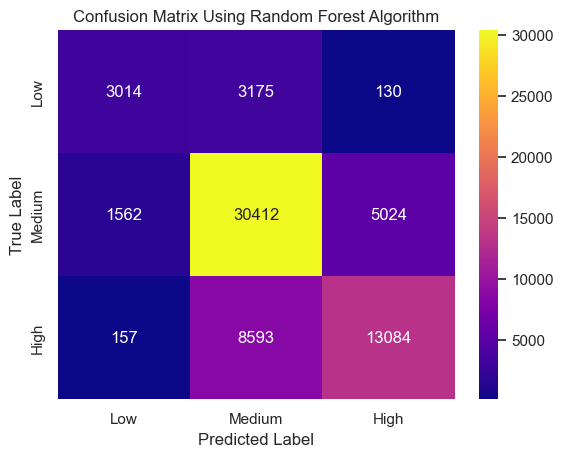

In [92]:
make_confusion_matrix(pred_rf, 'Random Forest')

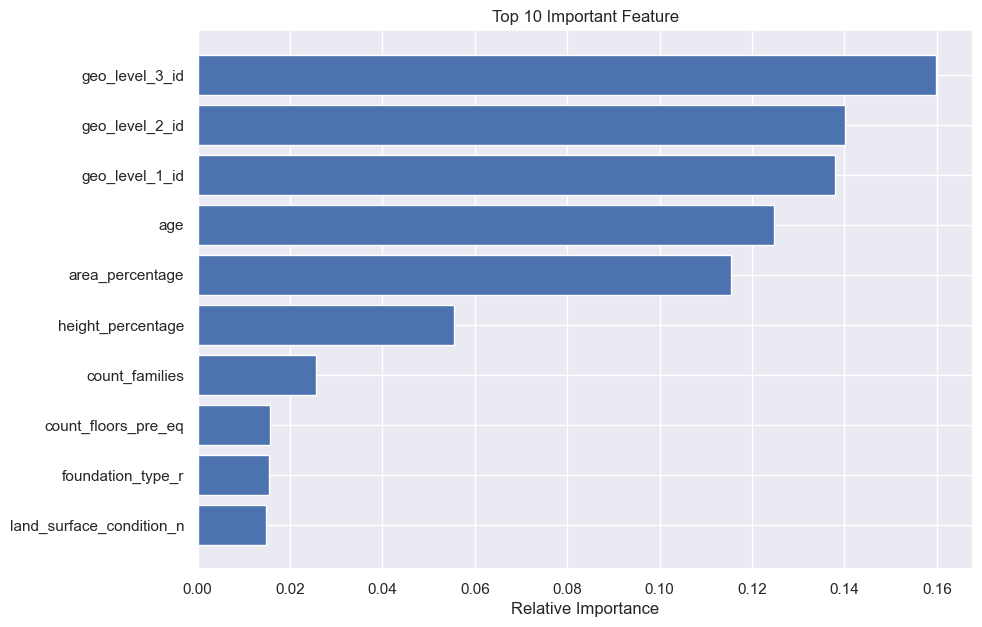

In [135]:
features = X.columns
importances = model_cv_rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices[-10:])), importances[indices][-10:], color='b', align='center')
plt.yticks(range(len(indices[-10:])), features[indices][-10:])
plt.xlabel('Relative Importance')
plt.title('Top 10 Important Feature')
plt.show()

### Model 4: XGB

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

model_cv_xgb = XGBClassifier(verbosity=0)
kfold = KFold(n_splits=10)
scores_xgb = cross_val_score(model_cv_xgb, X_train, y_train, scoring="f1_micro", cv=kfold)
result_xgb= scores_xgb.mean()
print('Average F1 Score (Micro) for Extreme Gradient Boosting is : {}'.format(result_xgb))

Average F1 Score (Micro) for Extreme Gradient Boosting is : 0.7263852647735993


              precision    recall  f1-score   support

           0       0.70      0.47      0.56      6319
           1       0.72      0.85      0.78     36998
           2       0.75      0.59      0.66     21834

    accuracy                           0.73     65151
   macro avg       0.72      0.64      0.67     65151
weighted avg       0.73      0.73      0.72     65151



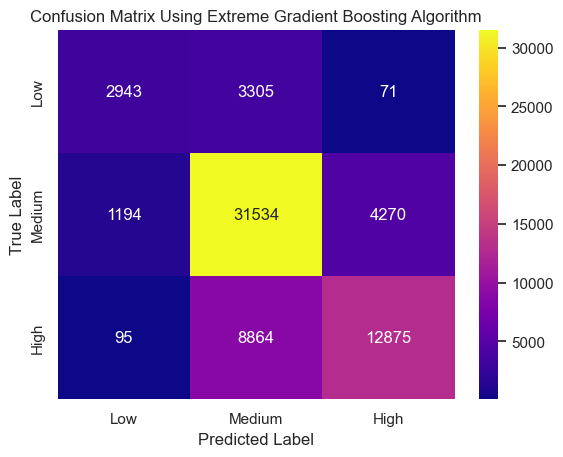

Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.7441084676387824
Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.7268038863563108


In [96]:
# model = XGBClassifier(verbosity=0, tree_method='gpu_hist')
model_cv_xgb.fit(X_train, y_train)
pred_xgb = model_cv_xgb.predict(X_test)
train_pred_xgb = model_cv_xgb.predict(X_train)

pred_xgb = le.inverse_transform(pred_xgb)
train_pred_xgb = le.inverse_transform(train_pred_xgb)
y_train = le.inverse_transform(y_train)
y_test = le.inverse_transform(y_test)


print(classification_report(y_test, pred_xgb))
make_confusion_matrix(pred_xgb, 'Extreme Gradient Boosting')
train_score_xgb = f1_score(y_train, train_pred_xgb, average='micro')
score_xgb = f1_score(y_test, pred_xgb, average='micro')
print('Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {}'.format(train_score_xgb))
print('Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {}'.format(score_xgb))

# with open('model_6', 'wb') as files:
#     pickle.dump(model_6, files)

### Feature Importances of XGB Model

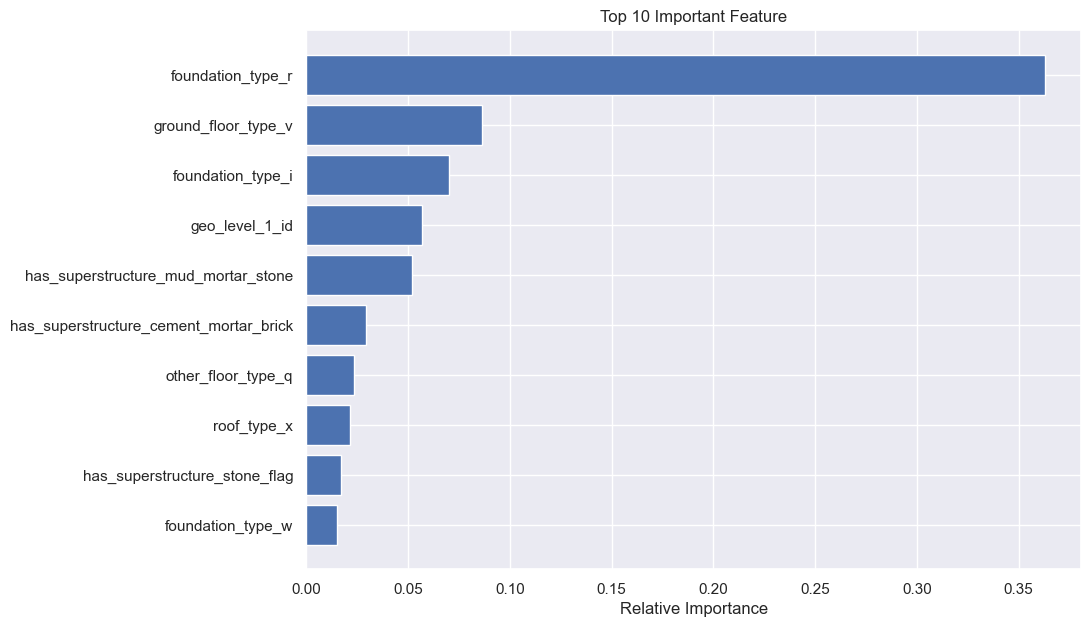

In [97]:
features = X.columns
importances = model_cv_xgb.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices[-10:])), importances[indices][-10:], color='b', align='center')
plt.yticks(range(len(indices[-10:])), features[indices][-10:])
plt.xlabel('Relative Importance')
plt.title('Top 10 Important Feature')
plt.show()